In [2]:
#Q1.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [3]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Apply Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy (No Regularization):", accuracy)

Model Accuracy (No Regularization): 0.956140350877193


In [8]:
#Q2
# Apply Logistic Regression with L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [9]:
# Predict and evaluate
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Model Accuracy (L1 Regularization):", accuracy_l1)

Model Accuracy (L1 Regularization): 0.956140350877193


In [10]:
#Q3
# Train Logistic Regression with L2 Regularization (default)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_l2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [11]:
# Predict and evaluate
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)


In [12]:

# Print results
print("Model Accuracy (L2 Regularization - Ridge):", accuracy_l2)
print("Model Coefficients:", model_l2.coef_)

Model Accuracy (L2 Regularization - Ridge): 0.956140350877193
Model Coefficients: [[ 2.11903551e+00  1.52412974e-01 -1.45506141e-01 -5.68775405e-04
  -1.39484699e-01 -4.12475923e-01 -6.43882314e-01 -3.38031470e-01
  -2.03184776e-01 -2.94865781e-02 -4.50845327e-02  1.42784335e+00
  -2.85668335e-01 -7.36495592e-02 -1.57094240e-02 -4.85858534e-03
  -4.70582967e-02 -3.71775702e-02 -4.09466206e-02  5.07845961e-03
   1.26292572e+00 -4.03696149e-01 -3.93660331e-02 -2.72360826e-02
  -2.56659019e-01 -1.20186940e+00 -1.60268191e+00 -6.04579927e-01
  -7.24947457e-01 -1.16184994e-01]]


In [13]:
#Q4.
# Train Logistic Regression with Elastic Net Regularization
model_elastic = LogisticRegression(
    penalty='elasticnet',
    solver='saga',         # 'saga' is required for elasticnet
    l1_ratio=0.5,          # Mix of L1 and L2; 0.5 = equal weight
    max_iter=1000
)
model_elastic.fit(X_train, y_train)

C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [14]:
# Predict and evaluate
y_pred_elastic = model_elastic.predict(X_test)
accuracy_elastic = accuracy_score(y_test, y_pred_elastic)

In [15]:
# Print results
print("Model Accuracy (Elastic Net):", accuracy_elastic)
print("Model Coefficients:", model_elastic.coef_)

Model Accuracy (Elastic Net): 0.9649122807017544
Model Coefficients: [[ 9.02264074e-03  1.00257390e-02  5.08511837e-02  1.57915281e-02
   3.90506186e-05 -5.44531529e-05 -1.82507308e-04 -5.43553099e-05
   1.09149157e-04  2.66339223e-05  6.43687461e-05  8.80405616e-04
  -3.08568629e-05 -1.35313900e-02  0.00000000e+00  0.00000000e+00
  -1.12647444e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.39995350e-03  1.11475668e-02  4.89579708e-02 -2.44776274e-02
   5.20931168e-05 -3.25561185e-04 -5.27686231e-04 -1.02753373e-04
   1.17752865e-04  7.43438466e-06]]


In [16]:
#q6.
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [17]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define Logistic Regression model
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)


In [20]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [21]:
# Apply GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [23]:
# Best model and accuracy
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters from GridSearchCV: {'C': 10, 'penalty': 'l1'}
Accuracy with Best Parameters: 1.0


In [24]:
#Q5
# Train Logistic Regression with One-vs-Rest strategy
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

In [25]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Multiclass Classification Accuracy (OvR):", accuracy)
print("Model Coefficients:", model.coef_)

Multiclass Classification Accuracy (OvR): 1.0
Model Coefficients: [[ 0.3711229   1.409712   -2.15210117 -0.95474179]
 [ 0.49400451 -1.58897112  0.43717015 -1.11187838]
 [-1.55895271 -1.58893375  2.39874554  2.15556209]]


In [28]:
#Q7
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [29]:
# Load dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

In [30]:
# Initialize model
model = LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [32]:
# Cross-validation scores
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')


In [33]:
# Print individual fold scores and average
print("Stratified K-Fold Accuracies:", scores)
print("Average Accuracy:", scores.mean())

Stratified K-Fold Accuracies: [0.94736842 0.92105263 0.95614035 0.96491228 0.96460177]
Average Accuracy: 0.9508150908244062


In [43]:
#Q9
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier

In [44]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [45]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Model
model = LogisticRegression(max_iter=1000)


In [47]:
# Hyperparameter space
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Compatible with l1/l2
}


In [48]:
# Randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)


C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\salon\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [49]:
# Evaluate best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [50]:
# Output
print("Best Parameters:", random_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 10.0}
Accuracy with Best Parameters: 1.0


In [51]:
#Q10
# One-vs-One classifier with Logistic Regression
base_model = LogisticRegression(max_iter=1000, solver='liblinear')
ovo_model = OneVsOneClassifier(base_model)
ovo_model.fit(X_train, y_train)


OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'))

In [53]:
# Evaluate
y_pred = ovo_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("One-vs-One Logistic Regression Accuracy:", accuracy)


One-vs-One Logistic Regression Accuracy: 1.0


In [61]:
#Q11.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score


In [62]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [63]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Train logistic regression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [65]:
# Predict
y_pred = model.predict(X_test)


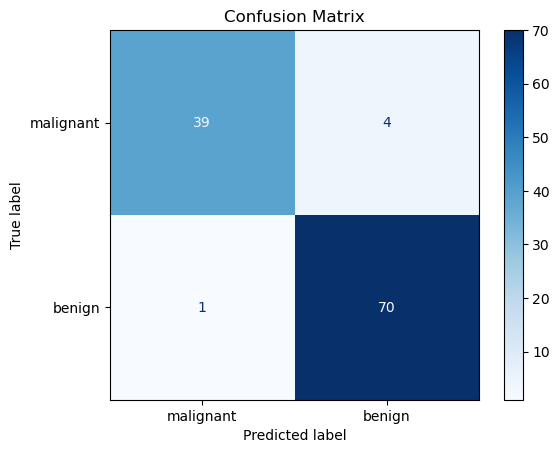

In [66]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [67]:
#Q12
# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [68]:
# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1-Score: 0.9655172413793103


In [69]:
#Q13.
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [70]:
# Create an imbalanced dataset (90% class 0, 10% class 1)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=10, weights=[0.9, 0.1], random_state=42)

In [71]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Train Logistic Regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [73]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report (Imbalanced Dataset with class_weight='balanced'):\n")
print(classification_report(y_test, y_pred))

Classification Report (Imbalanced Dataset with class_weight='balanced'):

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       184
           1       0.41      0.88      0.56        16

    accuracy                           0.89       200
   macro avg       0.70      0.88      0.75       200
weighted avg       0.94      0.89      0.91       200



In [74]:
#Q14.
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [75]:
# Load Titanic dataset
df = sns.load_dataset('titanic')


In [76]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [77]:
# Select relevant features
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]


In [78]:
# Drop rows with missing target or embarked values
df.dropna(subset=['survived', 'embarked'], inplace=True)


C:\Users\salon\AppData\Local\Temp\ipykernel_19232\100156058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['survived', 'embarked'], inplace=True)


In [79]:
# Fill missing age and fare with median
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


C:\Users\salon\AppData\Local\Temp\ipykernel_19232\3867748122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\salon\AppData\Local\Temp\ipykernel_19232\3867748122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare'].fillna(df['fare'].median(), inplace=True)


In [80]:
# Encode categorical variables
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])


C:\Users\salon\AppData\Local\Temp\ipykernel_19232\502673302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = LabelEncoder().fit_transform(df['sex'])
C:\Users\salon\AppData\Local\Temp\ipykernel_19232\502673302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = LabelEncoder().fit_transform(df['embarked'])


In [81]:
# Split features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [82]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [84]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Titanic Dataset - Logistic Regression Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Titanic Dataset - Logistic Regression Evaluation:

Accuracy: 0.7752808988764045
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [92]:
#Q15.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



In [93]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [94]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:

# Logistic Regression WITHOUT scaling
model_no_scaling = LogisticRegression(max_iter=1000, solver='liblinear')
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)


In [96]:
# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [97]:
# Logistic Regression WITH scaling
model_with_scaling = LogisticRegression(max_iter=1000, solver='liblinear')
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_scaled = model_with_scaling.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_scaled)

In [98]:
# Print accuracy comparison
print("Accuracy WITHOUT Scaling:", acc_no_scaling)
print("Accuracy WITH Scaling   :", acc_with_scaling)

Accuracy WITHOUT Scaling: 0.956140350877193
Accuracy WITH Scaling   : 0.9736842105263158


In [100]:
#Q16.
# Feature Scaling (ROC-AUC works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [102]:
# Predict probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [103]:
# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.99737962659679


In [104]:
#Q17.
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Train logistic regression with custom C (learning rate-like regularization)
model = LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

In [106]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with C=0.5:", accuracy)

Accuracy with C=0.5: 0.9824561403508771


In [107]:
#18.
import pandas as pd
import numpy as np


In [108]:
# Feature names
feature_names = data.feature_names

In [109]:
# Get coefficients from the trained model
coefficients = model.coef_[0]

In [110]:

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

In [111]:
# Sort by absolute value of coefficients
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

In [112]:
# Display top important features
print("\nTop Important Features Based on Coefficients:")
print(importance_df.head(10))


Top Important Features Based on Coefficients:
                 Feature  Coefficient  Absolute Coefficient
21         worst texture    -1.039707              1.039707
10          radius error    -0.973609              0.973609
28        worst symmetry    -0.921329              0.921329
7    mean concave points    -0.849625              0.849625
20          worst radius    -0.744125              0.744125
26       worst concavity    -0.736941              0.736941
23            worst area    -0.734524              0.734524
13            area error    -0.725686              0.725686
27  worst concave points    -0.666109              0.666109
6         mean concavity    -0.664949              0.664949


In [113]:
#Q19.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score

In [114]:

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [115]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [118]:

# Predict
y_pred = model.predict(X_test_scaled)


In [119]:
# Evaluate with Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen’s Kappa Score:", kappa)

Cohen’s Kappa Score: 0.9437314906219151


In [120]:
#Q20.
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay


In [121]:
# Predict probabilities
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

In [122]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

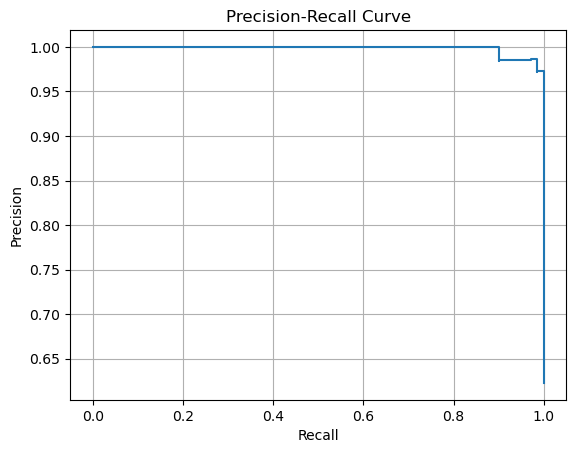

In [123]:

# Plot the curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

In [124]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [125]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [126]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']

print("Accuracy Comparison by Solver:\n")
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Solver: {solver:10s}  |  Accuracy: {acc:.4f}")

Accuracy Comparison by Solver:

Solver: liblinear   |  Accuracy: 0.9737
Solver: saga        |  Accuracy: 0.9737
Solver: lbfgs       |  Accuracy: 0.9737


In [129]:
#Q22.
from sklearn.metrics import matthews_corrcoef

In [130]:
# Using the model from previous code (e.g., with 'lbfgs' or any trained model)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [131]:
# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("\nMatthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.9438975339262832


In [132]:
#Q23
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [133]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [134]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
# Train on raw data
model_raw = LogisticRegression(max_iter=1000, solver='liblinear')
model_raw.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, model_raw.predict(X_test))

In [136]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
# Train on standardized data
model_scaled = LogisticRegression(max_iter=1000, solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

In [138]:
# Compare
print("Accuracy on Raw Data        :", acc_raw)
print("Accuracy on Standardized Data:", acc_scaled)

Accuracy on Raw Data        : 0.956140350877193
Accuracy on Standardized Data: 0.9736842105263158


In [139]:
#24.
import numpy as np
from sklearn.model_selection import GridSearchCV

In [140]:
# Define a range of C values (inverse of regularization strength)
param_grid = {'C': np.logspace(-4, 4, 10)}

In [141]:
# GridSearch with cross-validation
grid = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='accuracy')

In [142]:
# Best parameters and score
print("\nBest C Value (from GridSearchCV):", grid.best_params_['C'])
print("Best Cross-Validation Accuracy   :", grid.best_score_)



Best C Value (from GridSearchCV): 0.3593813663804626
Best Cross-Validation Accuracy   : 0.9780219780219781


In [143]:
# Evaluate on test data
y_pred_test = grid.best_estimator_.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best C        :", test_acc)

Test Accuracy with Best C        : 0.9824561403508771


In [144]:
#25
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib


In [145]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [146]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [148]:

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [153]:
# Save the model
joblib.dump(model, 'logistic_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [151]:
# Load the model and scaler
loaded_model = joblib.load('logistic_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')


In [152]:
# Use loaded model for prediction
X_new = X_test[0:5]  # First 5 samples
X_new_scaled = loaded_scaler.transform(X_new)
y_pred = loaded_model.predict(X_new_scaled)

print("\nPredictions for first 5 test samples:", y_pred)


Predictions for first 5 test samples: [1 0 0 1 1]


#THEORITICAL QUESTION

Q1.
| Aspect            | Logistic Regression                           | Linear Regression                   |
| ----------------- | --------------------------------------------- | ----------------------------------- |
| **Purpose**       | Classification (e.g., spam/not spam)          | Regression (e.g., predicting price) |
| **Output**        | Probability (0 to 1), mapped to classes       | Continuous real number              |
| **Function Used** | Sigmoid function (non-linear)                 | Linear function (y = mx + b)        |
| **Thresholding**  | Converts probability to class using threshold | No thresholding                     |


Q2.
THE LINEAR Part:
z = w1*x1 + w2*x2 + ... + wn*xn + b
Apply sigmoid function to get the probability:
P(y=1|x) = 1 / (1 + e^(-z))


Q3.
The sigmoid function maps any real value to a range between 0 and 1, making it perfect for:

Interpreting output as probability

Deciding the class using a threshold (e.g., 0.5)

Formula:
sigmoid(z) = 1 / (1 + e^(-z))


Q4.
We use the Log Loss / Binary Cross-Entropy:


J(θ) = -(1/m) * Σ [ y*log(p) + (1-y)*log(1-p) ]
Where:

m = number of examples

y = actual class (0 or 1)

p = predicted probability from sigmoid

This penalizes wrong predictions more heavily.





Q5.
Regularization is a technique to prevent overfitting by adding a penalty term to the loss function.

Updated cost:
J(θ) = Original Loss + λ * Regularization Term
Where λ is the regularization strength.

Why needed?

Helps in simplifying the model

Avoids learning noise from the data

Improves generalization on unseen data




Q6.
| Type            Regularization Term | Feature Selection | Notes                                    |     |                                          |
| -------------- | ------------------- | ----------------- | -------------------------------------------- | --- | ---------------------------------------- |
| **Ridge (L2)** | λ \* Σ(w²)          | No                | Shrinks coefficients, but doesn't eliminate  |     |                                          |
| **Lasso (L1)** | λ \* Σ(             | w                 | )                                            | Yes | Can reduce some weights to **exactly 0** |
| **ElasticNet** | λ₁ \* L1 + λ₂ \* L2 | Yes               | Combines both; balances sparsity + stability |     |                                          |


Q7.
Use Elastic Net when:

You have many features, and some of them are correlated.

Lasso might randomly select one and drop others.

Ridge keeps all features but doesn't perform feature selection.

Elastic Net:

Combines the strengths of Lasso (sparsity) and Ridge (stability with multicollinearity).

Offers a balance between variable selection and coefficient shrinkage.




Q8| Value of C (or λ)       | Effect on Model                      |
| ----------------------- | ------------------------------------ |
| **C → large** (λ small) | Less regularization → may overfit    |
| **C → small** (λ large) | Strong regularization → may underfit |
| **C = 1**               | Default; moderate regularization     |


Q9.
Linear relationship between independent variables and the log-odds.

No multicollinearity among independent variables.

Independence of observations.

Large sample size for stable probability estimates.

Outcome is binary or multiclass but categorical.



Q10.
| Algorithm            | When to Use                                         |
| -------------------- | --------------------------------------------------- |
| **Decision Tree**    | Non-linear patterns, interpretability               |
| **Random Forest**    | High accuracy, less prone to overfitting            |
| **SVM**              | High-dimensional space, margin-based classification |
| **Naive Bayes**      | Text data, independence assumptions                 |
| **KNN**              | Simple, non-parametric, small datasets              |
| **XGBoost/LightGBM** | High-performance gradient boosting models           |
| **Neural Networks**  | Complex, high-dimensional data (images, speech)     |


Q11.
| Metric               | Use Case                                     |
| -------------------- | -------------------------------------------- |
| **Accuracy**         | General correctness                          |
| **Precision**        | Low false positives (e.g., spam detection)   |
| **Recall**           | Low false negatives (e.g., cancer detection) |
| **F1-Score**         | Balance between precision and recall         |
| **ROC-AUC**          | Overall performance across thresholds        |
| **Confusion Matrix** | TP, FP, FN, TN counts                        |
| **Cohen’s Kappa**    | Agreement beyond chance                      |
| **MCC**              | Balanced accuracy on imbalanced data         |


Q12.
Problems it causes:

Model gets biased toward the majority class

Accuracy becomes misleading

Solutions:

Use class_weight='balanced'

Oversample minority class or undersample majority

Use precision, recall, F1-score instead of accuracy

Try SMOTE (Synthetic Minority Oversampling)



Q13.
It means:

Finding the best settings (like C, penalty, solver) to improve performance.

Techniques:

GridSearchCV: exhaustive search over parameter grid

RandomizedSearchCV: random search over parameter space

Cross-validation used to avoid overfitting while tuning

Common hyperparameters:

C (regularization strength)

penalty (l1, l2, elasticnet)

solver (solver algorithm)

class_weight


Q14.
| Solver        | Supports                          | Use When…                           
| **liblinear** | L1 & L2 (binary/multiclass OvR)   | Small datasets, good default               |
| **lbfgs**     | L2 (multiclass softmax)           | Large datasets, multinomial                |
| **saga**      | L1, L2, elasticnet (supports all) | Large datasets, sparse data, elasticnet    |
| **newton-cg** | L2 only                           | Multinomial classification                 |
| **sag**       | L2 only                           | Large datasets, requires standardized data |


Q15.
| Strategy               | Description                                                                                               
| **One-vs-Rest (OvR)**  | Trains **one classifier per class** against all others                                                    |
| **Softmax Regression** | Generalizes logistic regression by computing **probabilities for all classes** using the softmax function |

In scikit-learn, this is controlled using the multi_class parameter:

multi_class='ovr' (default)

multi_class='multinomial' (Softmax)




Q16.

Advantages:
Simple and easy to implement

Works well for linearly separable classes

Outputs probabilities

Can be regularized

Interpretable coefficients

❌ Disadvantages:
Assumes linear relationship in log-odds

Not suitable for complex non-linear problems

Sensitive to outliers and multicollinearity

Performs poorly when classes are highly imbalanced





Q17.
| Use Case                      | Description                                |
| ----------------------------- | ------------------------------------------ |
| **Medical Diagnosis**         | Predict if a patient has a disease (0/1)   |
| **Spam Detection**            | Classify email as spam or not              |
| **Customer Churn Prediction** | Will a customer leave a service?           |
| **Credit Scoring**            | Will a borrower default on a loan?         |
| **Marketing Response**        | Will a user click on an ad or not?         |
| **Fraud Detection**           | Flagging transactions as fraudulent or not |


Q18.
| Logistic Regression       | Softmax Regression                          |
| ------------------------- | ------------------------------------------- |
| Binary classification     | Multiclass classification (3+ classes)      |
| Uses **sigmoid function** | Uses **softmax function**                   |
| Output: P(class = 1)      | Output: Probabilities for **all classes**   |
| `multi_class='ovr'`       | `multi_class='multinomial'` in scikit-learn |


Q19.
| Criteria      | Choose OvR                               | Choose Softmax (Multinomial)                    |
| ------------- | ---------------------------------------- | ----------------------------------------------- |
| Simplicity    | Easier to train (multiple binary models) | Slightly more complex (single multiclass model) |
| Dataset Size  | Works well for **smaller** datasets      | Better for **large** datasets                   |
| Class Overlap | If classes are **clearly separated**     | If **classes are similar or correlated**        |
| Performance   | Sometimes comparable                     | Softmax often has **better overall accuracy**   |


Q20.
The coefficient wᵢ for a feature xᵢ means:

Holding all other features constant, a 1-unit increase in xᵢ changes the log-odds of the outcome by wᵢ.
odds_ratio = exp(wᵢ)
If odds_ratio > 1: Feature increases likelihood of class 1

If odds_ratio < 1: Feature decreases likelihood of class 1

Example:
If w = 0.7 → exp(0.7) ≈ 2.01

So, a 1-unit increase in the feature doubles the odds of being in the positive class.

